# CLASSIFICATION PROJECT ON CUSTOMER CHURN DATASET

# Problem Statement

This project aims to develop a predictive model to accurately identify and anticipate telecom customer churn, enabling providers to implement proactive retention strategies and enhance customer satisfaction while minimizing revenue loss.

# Exploratory Data Analysis

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
df.shape

(7043, 21)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [113]:
df = df.drop_duplicates()

In [114]:
df.shape

(7043, 21)

In [115]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

## Analysis

We do not need Customer ID in our analysis as it does not help us predict whether the customer will churn or not, also it increases the dimensionality.

In [116]:
df.drop(['customerID'], inplace=True, axis=1)

<Axes: ylabel='count'>

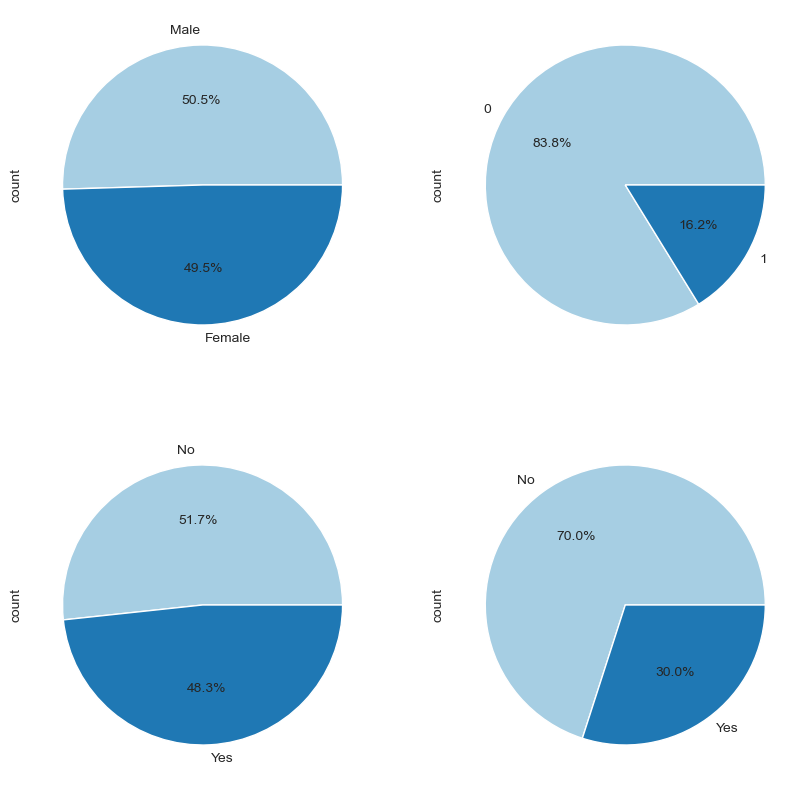

In [117]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))


plt.subplot(2,2,2)
df['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))


plt.subplot(2,2,3)
df['Partner'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))


plt.subplot(2,2,4)
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))


- We can see the proportion of our customers.

In [118]:
# We want to see the churn proportion for every feature column's different categories. We will create the following function:

def stacked_bar(df, group, target):
    
    churn_prc = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    churn_prc.plot(kind='bar', stacked=True, color = ['lightsteelblue', "steelblue"])
    plt.ylabel('Churn Percentage')

Text(0.5, 0, 'Gender')

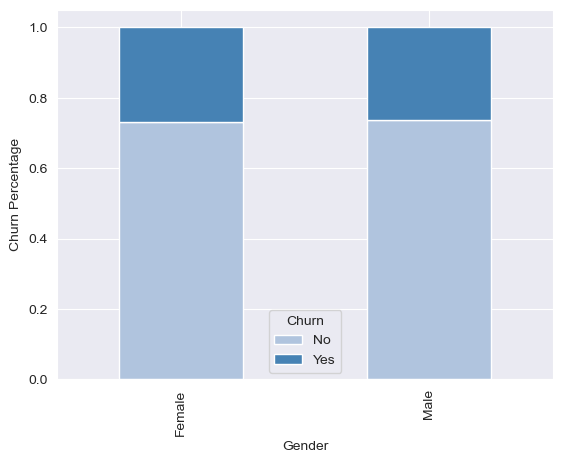

In [119]:
stacked_bar(df, 'gender', 'Churn')
plt.xlabel('Gender')

Text(0.5, 0, 'Senior Citizen')

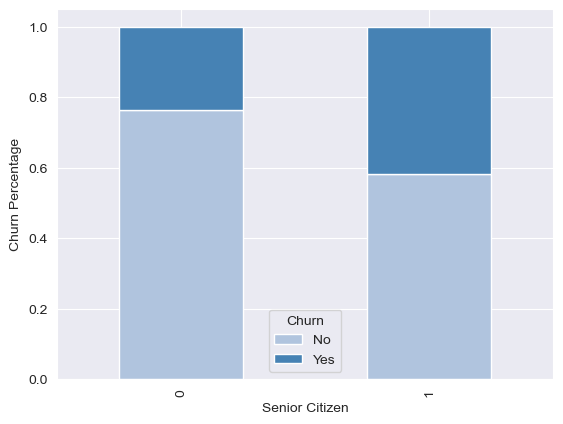

In [120]:
stacked_bar(df, 'SeniorCitizen', 'Churn')
plt.xlabel('Senior Citizen')


Text(0.5, 0, 'Partner')

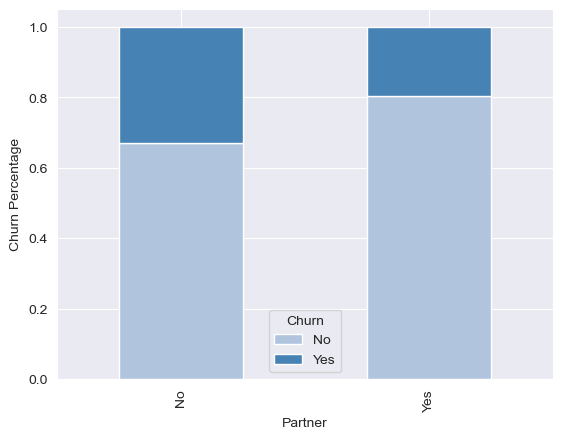

In [121]:
stacked_bar(df, 'Partner', 'Churn')
plt.xlabel('Partner')

Text(0.5, 0, 'Dependents')

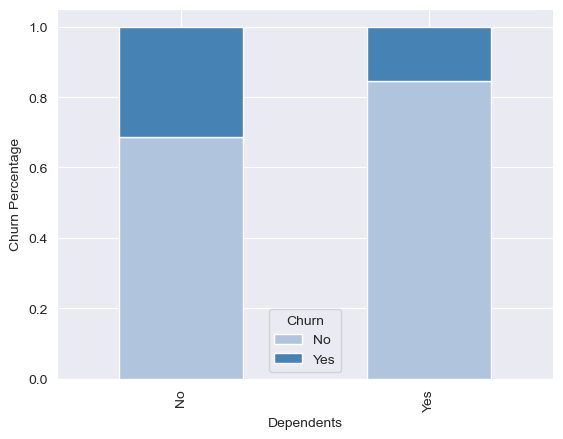

In [122]:
stacked_bar(df, 'Dependents', 'Churn')
plt.xlabel('Dependents')

From above plots, we can infer the following:
- Gender alone does not help us predict the customer churn.
- Churn rate worsens by almost double for Senior Citizens.
- For young people churn rate is lower, same is for people with partner or dependents.

We can explore the last statement further:

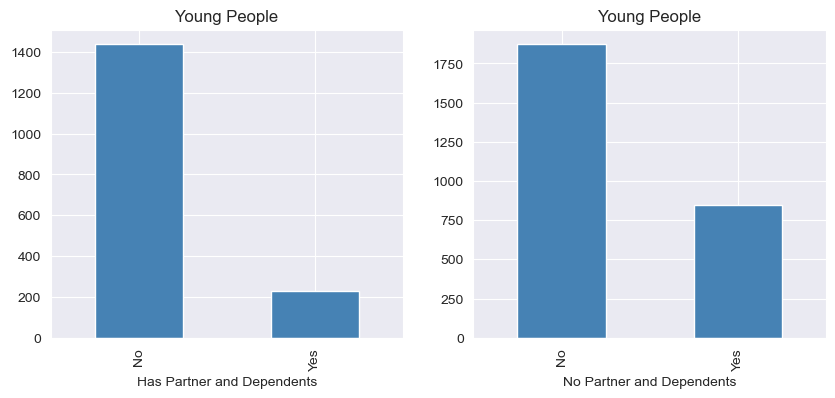

In [123]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
(df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()).plot(kind='bar', color='steelblue')
plt.xlabel('Has Partner and Dependents')
plt.title('Young People')

plt.subplot(1,2,2)
(df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()).plot(kind='bar', color='steelblue')
plt.xlabel('No Partner and Dependents')
plt.title('Young People')

plt.show()

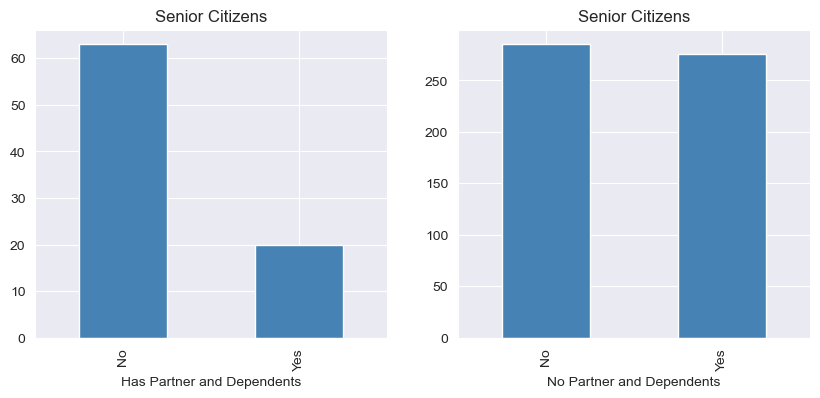

In [124]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
(df[(df.SeniorCitizen == 1) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()).plot(kind='bar', color='steelblue')
plt.xlabel('Has Partner and Dependents')
plt.title('Senior Citizens')

plt.subplot(1,2,2)
(df[(df.SeniorCitizen == 1) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()).plot(kind='bar', color='steelblue')
plt.xlabel('No Partner and Dependents')
plt.title('Senior Citizens')

plt.show()

The churn rate is maximum for Senior citizens without any partner and dependent.

It is the lowest for young people with partner and dependents.

The main factors here affecting the churn rate can be considered to be Partner and Dependents.
- Even for senior citizens who have partners and dependents, the churn rate rate is decreasing by two times.
- Similiar results can be seen for young people. 

### Tenure

In [125]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Count'>

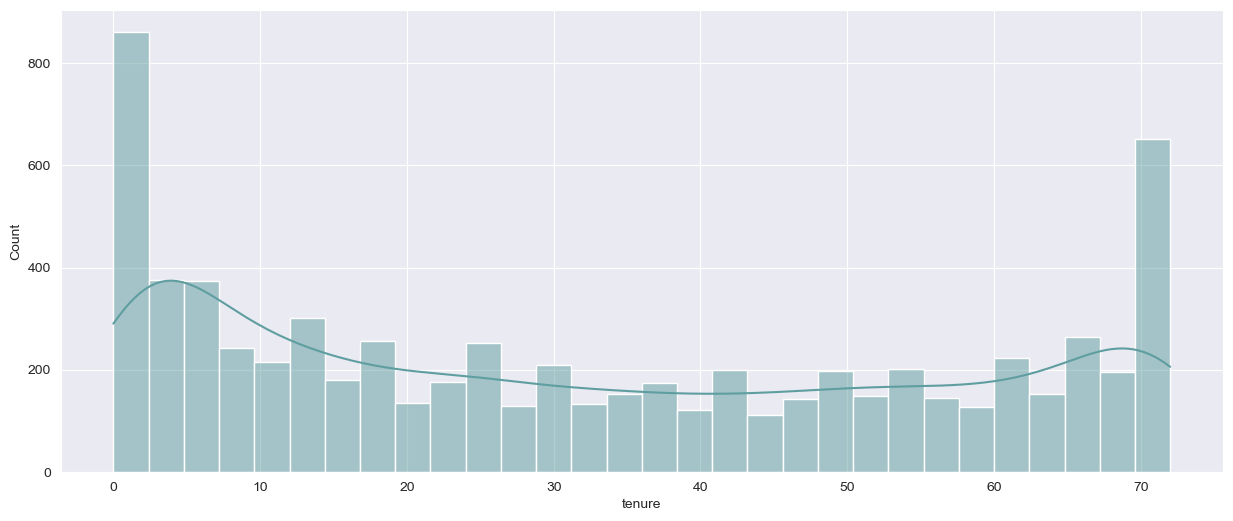

In [126]:
plt.figure(figsize=(15,6))
sns.histplot(x=df['tenure'], bins=30, kde=True, color='cadetblue')

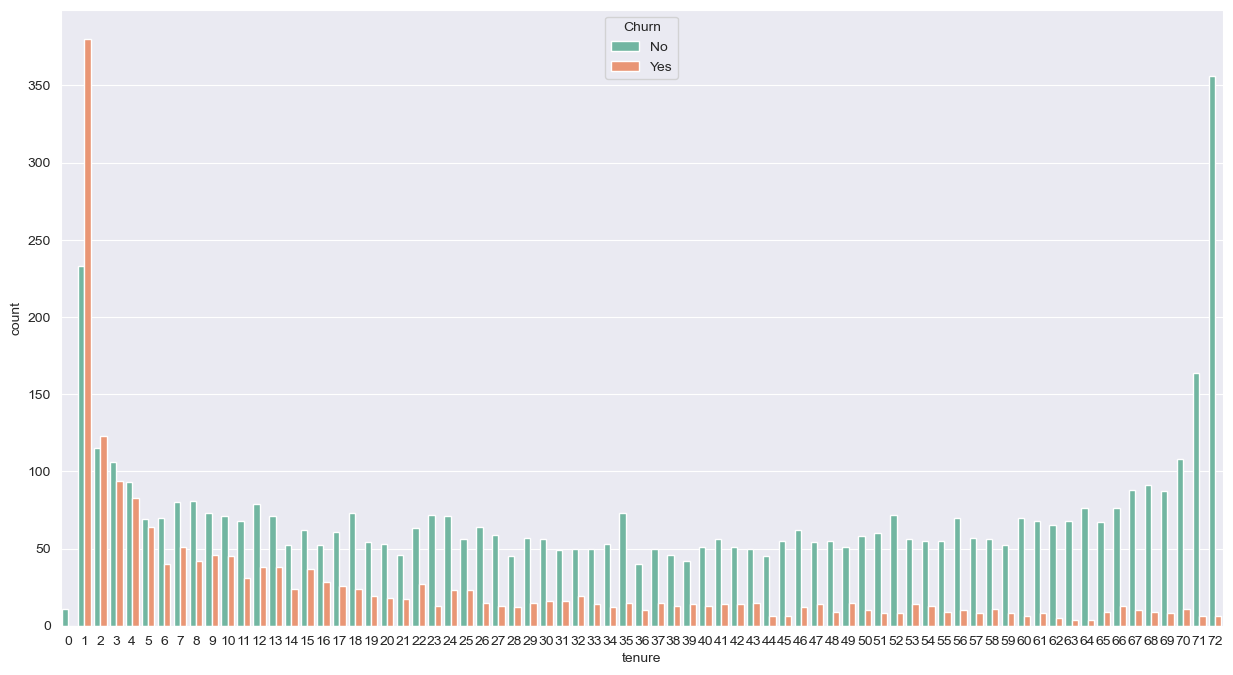

In [127]:
plt.figure(figsize=(15,8))
sns.countplot(x='tenure', hue='Churn', data=df, palette=sns.color_palette('Set2'))
plt.show()

- As we can see higher the tenure, lesser the churn rate. This tells us that customers become loyal as tenure increases.
- Churn rate for first three months is more than 1, meaning more customers leave than retained.

Converting tenure into 5 groups to reduce model complexity.

In [128]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6
    
df['tenure_group'] = df['tenure'].apply(tenure)

In [129]:
df['tenure_group'].value_counts()

tenure_group
1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

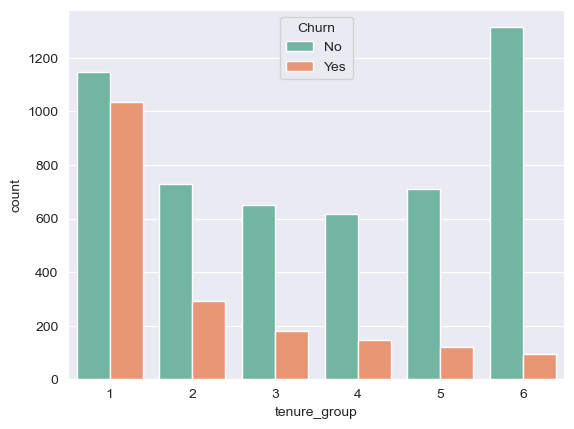

In [130]:
sns.countplot(x='tenure_group', hue='Churn', data=df, palette=sns.color_palette('Set2'))

- As tenure group increases the churn rate decreases.

<Axes: ylabel='count'>

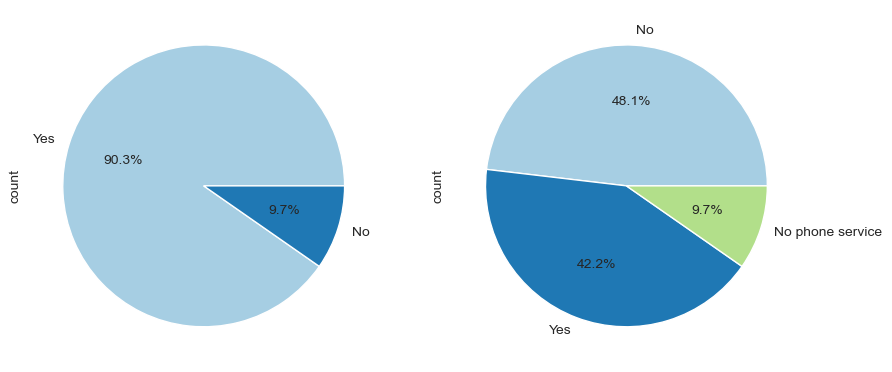

In [131]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df['PhoneService'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))

plt.subplot(1,2,2)
df['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))

Text(0.5, 0, 'Phone Service')

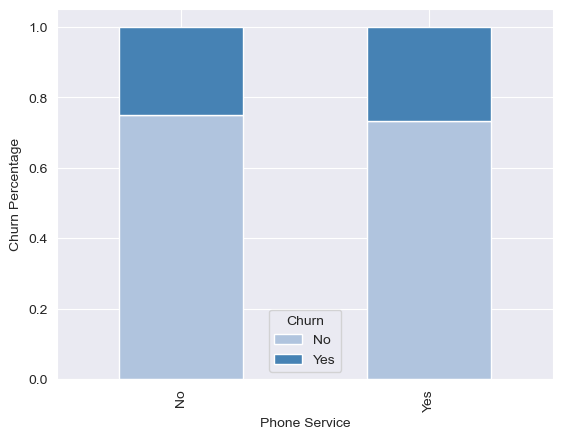

In [132]:
stacked_bar(df, 'PhoneService', 'Churn')
plt.xlabel('Phone Service')

Text(0.5, 0, 'Multiple Lines')

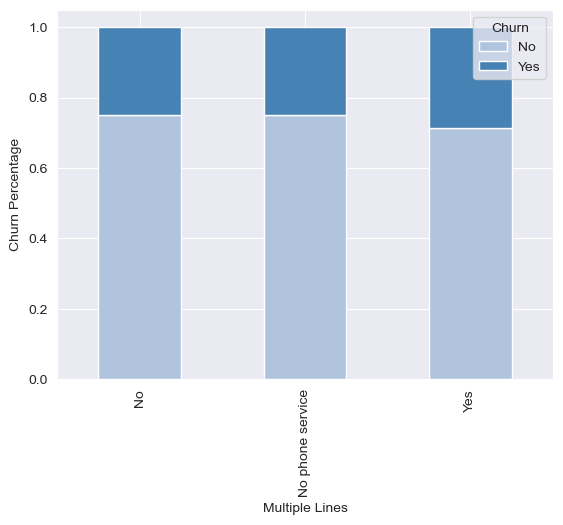

In [133]:
stacked_bar(df, 'MultipleLines', 'Churn')
plt.xlabel('Multiple Lines')

- As we can see multiple phone lines and phone service do not add value in the model having similiar churn rate.

### Internet Service

<Axes: ylabel='count'>

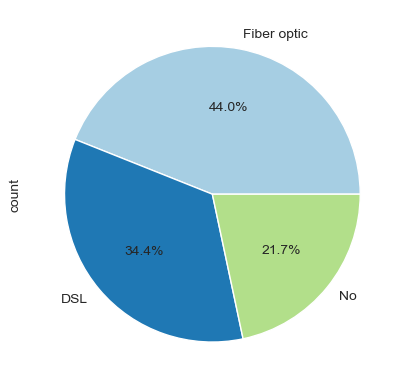

In [134]:
df['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))

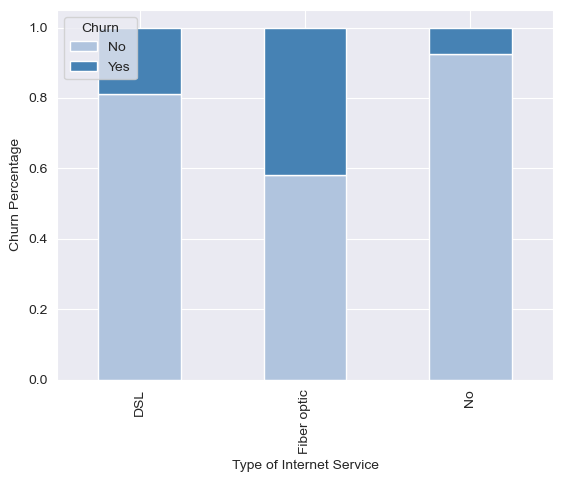

In [135]:
stacked_bar(df, 'InternetService', 'Churn')
plt.xlabel('Type of Internet Service')
plt.show()

In [136]:
df.groupby('InternetService')['MonthlyCharges'].mean()

InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

- When the internet service is Fiber Optic the churn rate is very high. Churn rate is decreasing for Internet Services when the monthly charges are decreasing.

### Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies

Text(0.5, 0, 'Online Security')

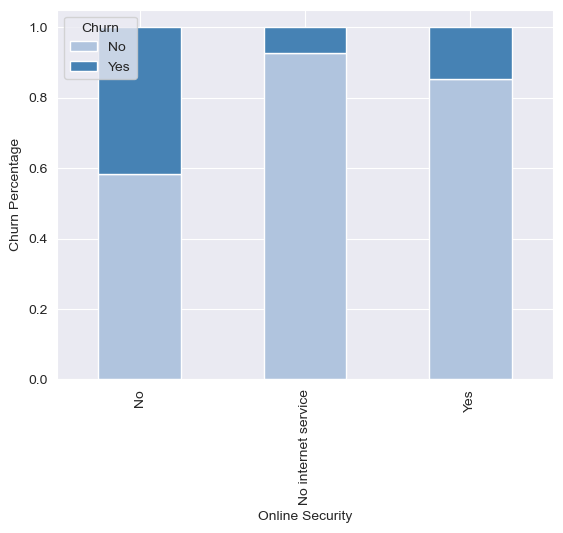

In [137]:
stacked_bar(df, 'OnlineSecurity', 'Churn')
plt.xlabel('Online Security')

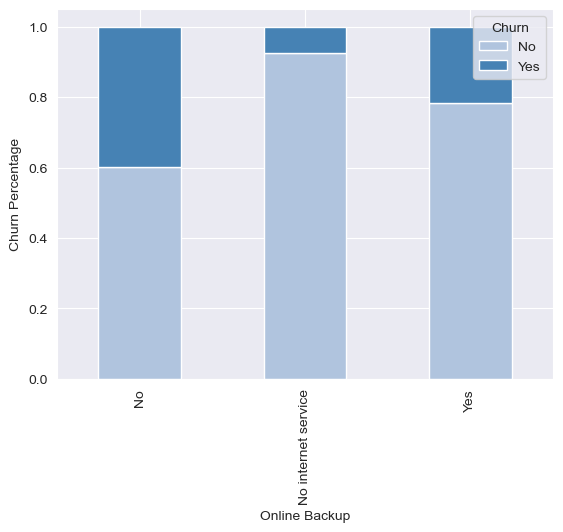

In [138]:
stacked_bar(df, 'OnlineBackup', 'Churn')
plt.xlabel('Online Backup')
plt.show()

Text(0.5, 0, 'Online Backup')

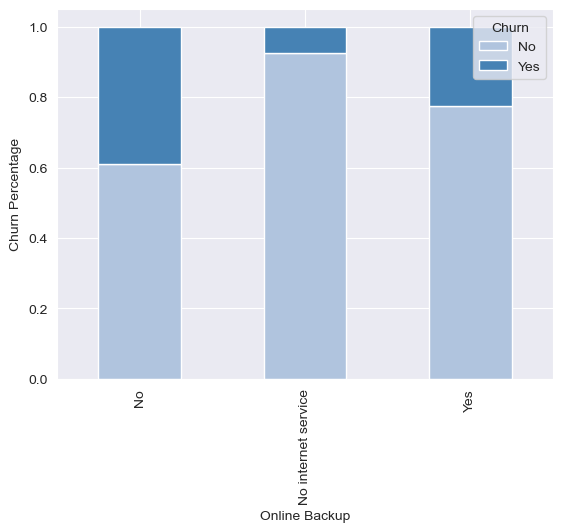

In [139]:
stacked_bar(df, 'DeviceProtection', 'Churn')
plt.xlabel('Online Backup')

Text(0.5, 0, 'Tech Support')

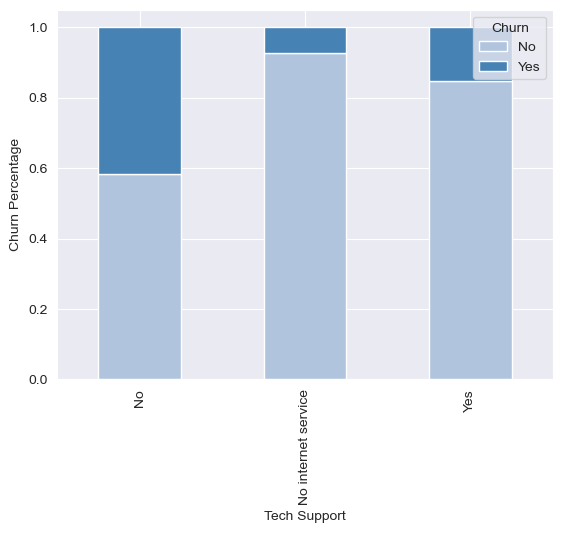

In [140]:
stacked_bar(df, 'TechSupport', 'Churn')
plt.xlabel('Tech Support')

- In all the above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. We have stated the reason above. Also, if they have internet services and do not opt for specific service their probability of churning is high. 

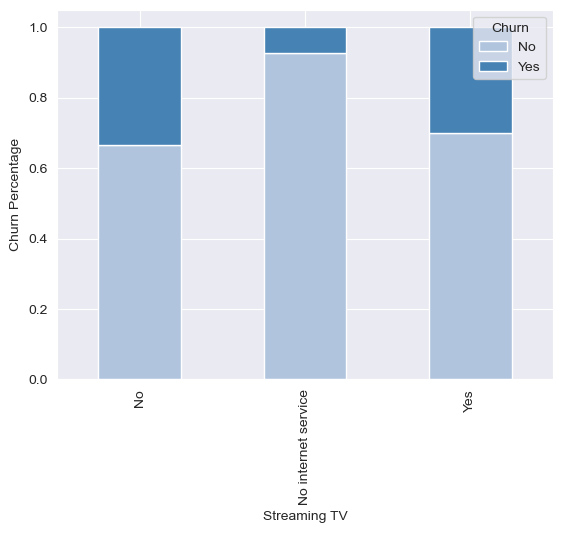

In [141]:
stacked_bar(df, 'StreamingTV', 'Churn')
plt.xlabel('Streaming TV')
plt.show()

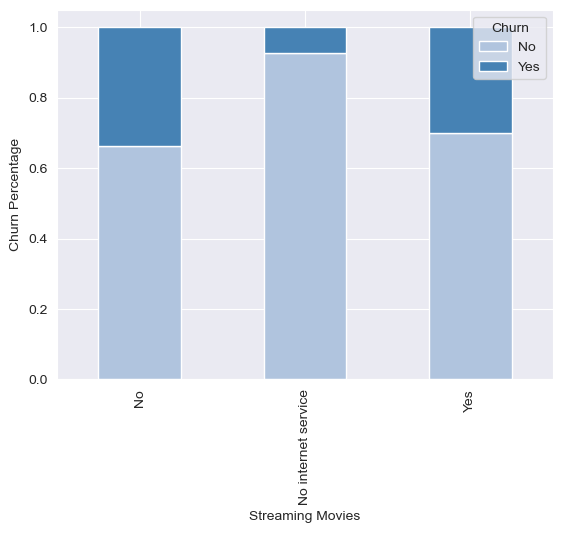

In [142]:
stacked_bar(df, 'StreamingMovies', 'Churn')
plt.xlabel('Streaming Movies')
plt.show()

- No internet service has the same impact here as well. The churning rate is low when people are opting for these two services but there is a minimal difference.

### Contract

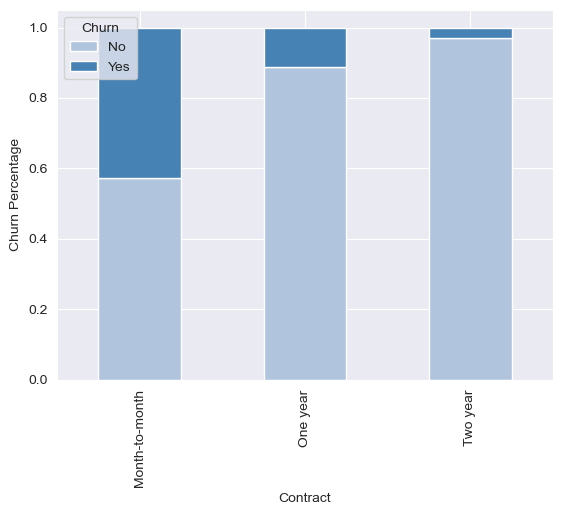

In [143]:
stacked_bar(df, 'Contract', 'Churn')

- In this case Month-to-Month contact churn rate is very high. There is also a possibility of having customers in the dataframe who are still in their two or one year contract plan, thereby reducing their churn rate.

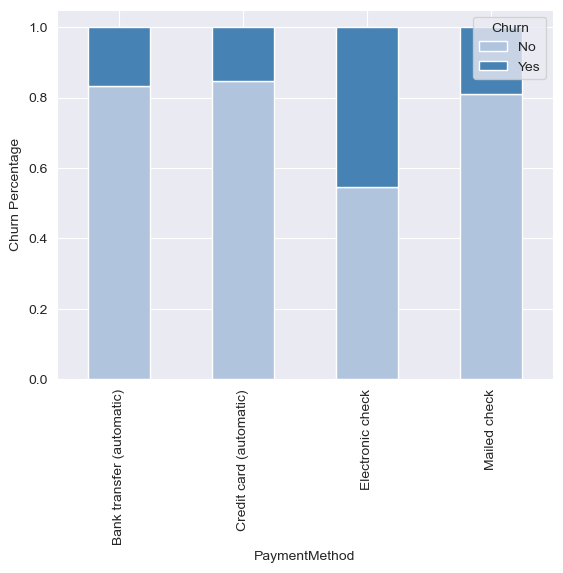

In [144]:
stacked_bar(df, 'PaymentMethod', 'Churn')

<Axes: xlabel='Contract', ylabel='count'>

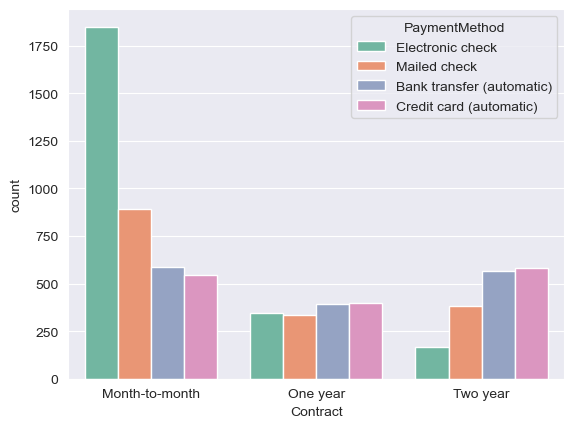

In [145]:
sns.countplot(x='Contract', hue='PaymentMethod', data=df, palette=sns.color_palette('Set2'))

- These two features are related but we cannot conclude the exact relationship here whether Month-to-Month contacters are churning because of electronic check or electronic check's churn rate is higer because of Month-to-Month contracters. The later one seems more logical. Lets compare with another variable:

<Axes: xlabel='InternetService', ylabel='count'>

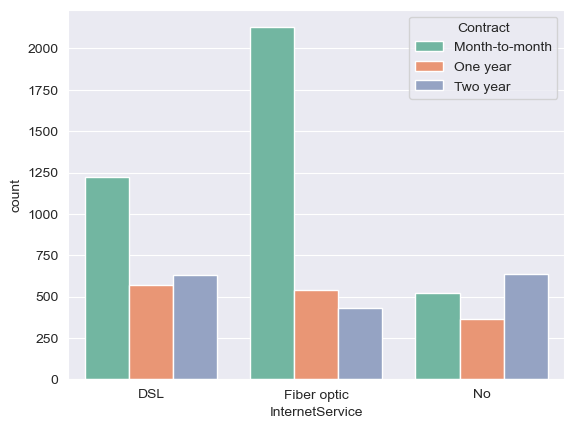

In [146]:
sns.countplot(x='InternetService', hue='Contract', data=df, palette=sns.color_palette('Set2'))

In [147]:
df.groupby('Contract')['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

- More Month-to-Month contracters using fiber optic service  might be the one of the reasons for higher Churn rate for fiber optic.

### Paperless Billing

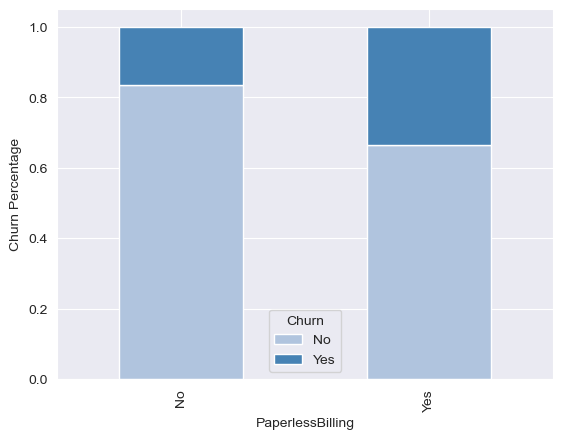

In [148]:
stacked_bar(df, 'PaperlessBilling', 'Churn')

# Data Preprocessing

In [149]:
df = df.replace('?', np.nan)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [150]:
df = df.replace(' ', np.nan)
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64

In [151]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


- All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [152]:
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, 0)
df.TotalCharges.isna().sum()

0

<Axes: >

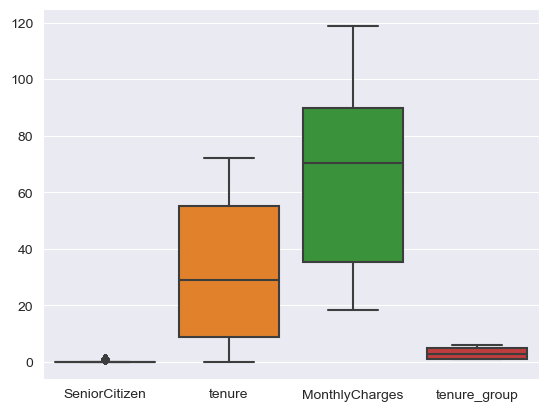

In [153]:
sns.boxplot(df)

In [154]:
# We will remove the features which proved to be not useful in predicting the churn.

df = df.drop(columns=['gender','PhoneService','MultipleLines','StreamingTV','StreamingMovies','tenure'])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   InternetService   7043 non-null   object 
 4   OnlineSecurity    7043 non-null   object 
 5   OnlineBackup      7043 non-null   object 
 6   DeviceProtection  7043 non-null   object 
 7   TechSupport       7043 non-null   object 
 8   Contract          7043 non-null   object 
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7043 non-null   object 
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   object 
 13  Churn             7043 non-null   object 
 14  tenure_group      7043 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB


In [156]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [157]:
X = df.drop('Churn', axis=1)
y = df.Churn

In [158]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

In [159]:
X_num.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_group
0,0,29.85,29.85,1
1,0,56.95,1889.50,3
2,0,53.85,108.15,1
3,0,42.30,1840.75,4
4,0,70.70,151.65,1


In [160]:
# Scaling the numerical data

from sklearn.preprocessing import MinMaxScaler

X_num_scaled = MinMaxScaler().fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [161]:
X_num_scaled.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_group
0,0.0,0.115423,0.003437,0.0
1,0.0,0.385075,0.217564,0.4
2,0.0,0.354229,0.012453,0.0
3,0.0,0.239303,0.211951,0.6
4,0.0,0.521891,0.017462,0.0


In [162]:
X_cat.head()

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,Yes,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check
1,No,No,DSL,Yes,No,Yes,No,One year,No,Mailed check
2,No,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check
3,No,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic)
4,No,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check


In [163]:
# We will perform One hot Encoding on the object type columns.

X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [164]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((7043, 32), (7043, 4), (7043, 28))

In [165]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [166]:
y = y.map({'No':0, 'Yes':1})

In [167]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [168]:
print("\nChecking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Checking for NAs and Shape Compatibility
SeniorCitizen                              0
MonthlyCharges                             0
TotalCharges                               0
tenure_group                               0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_N

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [170]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(5634, 32)
(1409, 32)
(5634,)
(1409,)


## KNN Classifier

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay,confusion_matrix

In [172]:
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(X_train, y_train)

### We will make the confusion matrix and calculate all metrics from scratch

In [173]:
model.predict_proba(X_train)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [174]:
# Predict probabilities and add to dataframe
X_train['prob'] = model.predict_proba(X_train)[:, 1]

In [175]:
X_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure_group,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,prob
2142,0.0,0.463682,0.153924,0.2,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0.000000
1623,0.0,0.785572,0.590624,0.8,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,0.000000
6074,0.0,0.051741,0.002700,0.0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.666667
1362,0.0,0.516915,0.027398,0.0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0.666667
6754,0.0,0.434328,0.000000,0.0,1,0,0,1,1,0,...,0,0,1,0,1,1,0,0,0,0.000000


In [176]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [177]:
X_train_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])
X_train_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


In [178]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_train_pred = (X_train['prob'] > threshold).astype(int)
    cm = confusion_matrix(y_train, y_train_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    X_train_ROC.loc[len(X_train_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})
# added values of TP,TN,FP,FN TPR,FPR,TPR-FPR into dataframe
X_train_ROC.head()

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,1496.0,2785.0,1353.0,0.0,1.000000,0.326970
1,0.1,1496.0,2785.0,1353.0,0.0,1.000000,0.326970
2,0.2,1496.0,2785.0,1353.0,0.0,1.000000,0.326970
3,0.3,1496.0,2785.0,1353.0,0.0,1.000000,0.326970
4,0.4,995.0,3826.0,312.0,501.0,0.665107,0.075399


In [179]:
# Compute AUC
auc_train_k3 = roc_auc_score(y_train, X_train['prob'])

# Print  AUC
print('AUC:', auc_train_k3)

AUC: 0.9181851620431994


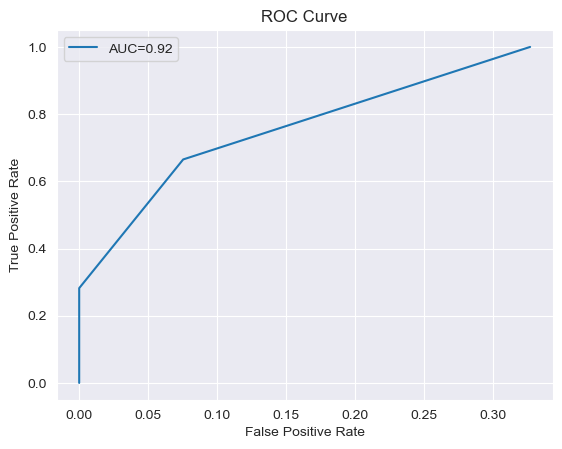

In [180]:
# Plot ROC curve from X_train_ROC
plt.plot(X_train_ROC['FPR'], X_train_ROC['TPR'], label=f'AUC={auc_train_k3:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [181]:
# Compute TPR - FPR
X_train_ROC['TPR-FPR'] = X_train_ROC['TPR'] - X_train_ROC['FPR']

# Select threshold with max TPR - FPR
max_TPR_FPR_diff = X_train_ROC['TPR-FPR'].max()
selected_threshold = X_train_ROC[X_train_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
selected_threshold

0.0

In [182]:
X_train_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR,TPR-FPR
0,0.0,1496.0,2785.0,1353.0,0.0,1.000000,0.326970,0.673030
1,0.1,1496.0,2785.0,1353.0,0.0,1.000000,0.326970,0.673030
2,0.2,1496.0,2785.0,1353.0,0.0,1.000000,0.326970,0.673030
3,0.3,1496.0,2785.0,1353.0,0.0,1.000000,0.326970,0.673030
4,0.4,995.0,3826.0,312.0,501.0,0.665107,0.075399,0.589708
5,0.5,995.0,3826.0,312.0,501.0,0.665107,0.075399,0.589708
6,0.6,995.0,3826.0,312.0,501.0,0.665107,0.075399,0.589708
7,0.7,422.0,4138.0,0.0,1074.0,0.282086,0.000000,0.282086
8,0.8,422.0,4138.0,0.0,1074.0,0.282086,0.000000,0.282086
9,0.9,422.0,4138.0,0.0,1074.0,0.282086,0.000000,0.282086


We can see that [TPR-FPR] is same from threshold 0.0 to 0.3. Hence we are choosing the later one.

In [183]:
selected_threshold = 0.3

In [184]:
# Compute confusion matrix for this threshold
y_train_pred_selected_threshold = (X_train['prob'] > selected_threshold).astype(int)
cm_max_diff = confusion_matrix(y_train, y_train_pred_selected_threshold)
cm_max_diff

array([[2785, 1353],
       [   0, 1496]])

In [185]:
# Print threshold

# Create a dataframe for the confusion matrix with labels
cm_df = pd.DataFrame(cm_max_diff, 
                     columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Print confusion matrix
print('\nConfusion matrix at this threshold:')
print(cm_df)


Confusion matrix at this threshold:
                 Predicted Negative  Predicted Positive
Actual Negative                2785                1353
Actual Positive                   0                1496


In [186]:
# Calculate metrics from confusion matrix
TN = cm_max_diff[0, 0]
FP = cm_max_diff[0, 1]
FN = cm_max_diff[1, 0]
TP = cm_max_diff[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

# Print metrics
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.7598509052183173
Misclassification Rate: 0.24014909478168267
Sensitivity (Recall): 1.0
Specificity: 0.6730304494925085
Precision: 0.525096525096525
F1 Score: 0.6886075949367089


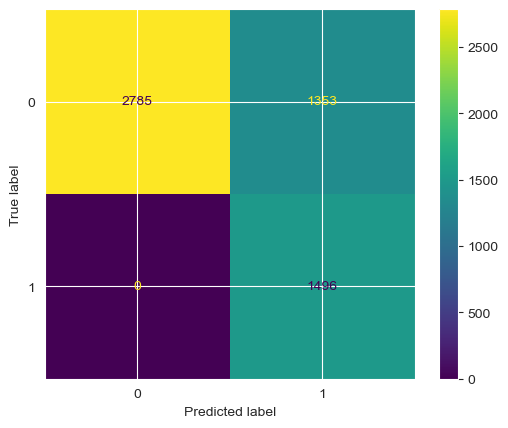

In [187]:
ConfusionMatrixDisplay(cm_max_diff).plot()
plt.show()

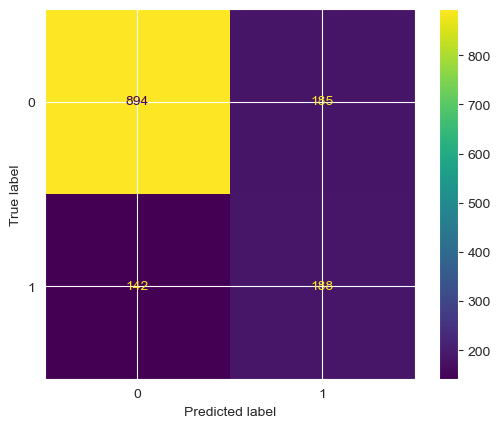

In [188]:
y_pred_test_knn = model.predict(X_test)

confusion_matrix_knn = confusion_matrix(y_pred_test_knn,y_test)
ConfusionMatrixDisplay(confusion_matrix_knn).plot()
plt.show()

In [189]:
print('Accuracy score of the model:', accuracy_score(y_pred_test_knn,y_test))
print('Recall score of the model:', recall_score(y_pred_test_knn,y_test))
print('AUC for the model:', roc_auc_score(y_pred_test_knn, y_test))

Accuracy score of the model: 0.7679205110007097
Recall score of the model: 0.5696969696969697
AUC for the model: 0.6991209593619232


In [190]:
X_train = X_train.drop('prob', axis=1)

In [191]:
#finding the best k:

Accuracy_Train=[]
Accuracy_Test=[]
Recall_Train=[]
Recall_Test=[]
Precision_Train=[]
Precision_Test=[]
AUC_ROC_train=[]
AUC_ROC_test=[]
k=[]

for i in range(3,20,2):
    knn_class = KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(X_train, y_train)
    
    #predicting on the train ,test data
    knn_train_preds = knn_class.predict(X_train)
    knn_test_preds = knn_class.predict(X_test)
    
    # check accuracy for train and test dataset
    knn_train_accuracy=accuracy_score(y_train, knn_train_preds)
    knn_test_accuracy=accuracy_score(y_test, knn_test_preds)
    Accuracy_Train.append(knn_train_accuracy)
    Accuracy_Test.append(knn_test_accuracy)
    
    # check recall for train and test dataset
    knn_train_recall=recall_score(y_train, knn_train_preds)
    knn_test_recall=recall_score(y_test, knn_test_preds)
    Recall_Train.append(knn_train_recall)
    Recall_Test.append(knn_test_recall)
    
    # check precision score for train and test 
    knn_train_precision=precision_score(y_train, knn_train_preds)
    knn_test_precision=precision_score(y_test, knn_test_preds)
    Precision_Train.append(knn_train_precision)
    Precision_Test.append(knn_test_precision)
    
    # check auc roc curve
    knn_train_auc = roc_auc_score(y_train, knn_class.predict_proba(X_train)[:,1])
    knn_test_auc = roc_auc_score(y_test, knn_class.predict_proba(X_test)[:,1])
    AUC_ROC_train.append(knn_train_auc)
    AUC_ROC_test.append(knn_test_auc)
    k.append(i)

knn_res=pd.DataFrame({'k':k,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,'Recall Train':Recall_Train,'Recall test':Recall_Test,
                     'Precision train':Precision_Train,'Precision test':Precision_Test,'AUC_ROC train':AUC_ROC_train,'AUC_ROC test':AUC_ROC_test})
knn_res



,k,Accuracy Train,Accuracy Test,Recall Train,Recall test,Precision train,Precision test,AUC_ROC train,AUC_ROC test
0,3,0.855698,0.767921,0.665107,0.504021,0.761285,0.569697,0.918185,0.756511
1,5,0.830493,0.765082,0.589572,0.495979,0.721177,0.564024,0.891778,0.789390
2,7,0.819844,0.765082,0.580214,0.495979,0.691633,0.564024,0.879981,0.801578
3,9,0.816649,0.776437,0.566845,0.509383,0.687753,0.590062,0.875156,0.811480
4,11,0.812567,0.784244,0.556150,0.525469,0.679739,0.606811,0.867971,0.817640
5,13,0.808662,0.784244,0.540107,0.522788,0.674457,0.607477,0.862524,0.823200
6,15,0.805644,0.787083,0.534091,0.533512,0.667502,0.612308,0.857806,0.825455
7,17,0.802094,0.794180,0.534759,0.552279,0.656276,0.626140,0.854271,0.830347
8,19,0.803514,0.801278,0.548128,0.563003,0.655476,0.642202,0.851636,0.835281


### K=19 seems to be the best fit for this model.

In [192]:
knn = KNeighborsClassifier(n_neighbors=19)
model1 = knn.fit(X_train, y_train)
knn_train_pred = model1.predict(X_train)
knn_test_pred = model1.predict(X_test)

In [193]:
knn_train_accuracy = 0.803514
knn_test_accuracy = 0.801278
knn_train_recall = 0.548128
knn_test_recall = 0.563003
knn_train_precision = 0.655476
knn_test_precision = 0.642202

<function matplotlib.pyplot.show(close=None, block=None)>

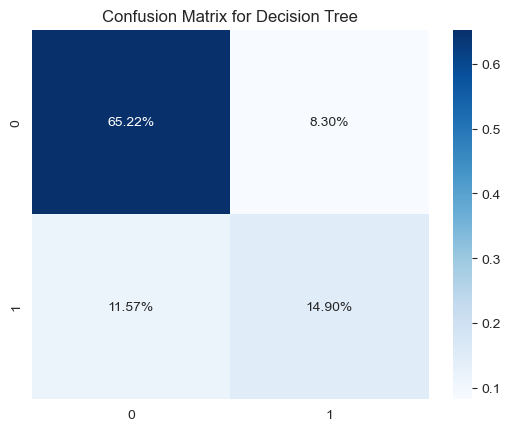

In [194]:
cf1=confusion_matrix(y_test, knn_test_pred)
sns.heatmap((cf1)/np.sum(cf1),annot=True,  fmt='0.2%',cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show

# Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
#fitting the model
Accuracy_Train=[]
Accuracy_Test=[]
Recall_Train=[]
Recall_Test=[]
Precision_Train=[]
Precision_Test=[]
AUC_ROC_train=[]
AUC_ROC_test=[]
depth=[]

for d in range(3,20):
    dt_class = DecisionTreeClassifier(criterion='entropy',max_depth=d)
    dt_class.fit(X_train, y_train)
    
    #predicting on the train ,test data
    dtyhat_train_entropy = dt_class.predict(X_train)
    dtyhat_test_entropy = dt_class.predict(X_test)
    
    # check accuracy for train and test dataset
    dt_train_accuracy=accuracy_score(y_train, dtyhat_train_entropy)
    dt_test_accuracy=accuracy_score(y_test, dtyhat_test_entropy)
    Accuracy_Train.append(dt_train_accuracy)
    Accuracy_Test.append(dt_test_accuracy)
    
    # check recall for train and test dataset
    dt_train_recall=recall_score(y_train, dtyhat_train_entropy)
    dt_test_recall=recall_score(y_test, dtyhat_test_entropy)
    Recall_Train.append(dt_train_recall)
    Recall_Test.append(dt_test_recall)
    
    # check precision score for train and test 
    dt_train_precision=precision_score(y_train, dtyhat_train_entropy)
    dt_test_precision=precision_score(y_test, dtyhat_test_entropy)
    Precision_Train.append(dt_train_precision)
    Precision_Test.append(dt_test_precision)
    
    # check auc roc curve
    dt_train_auc = roc_auc_score(y_train, dt_class.predict_proba(X_train)[:,1])
    dt_test_auc = roc_auc_score(y_test, dt_class.predict_proba(X_test)[:,1])
    AUC_ROC_train.append(dt_train_auc)
    AUC_ROC_test.append(dt_test_auc)
    
    depth.append(d)

dt_entropy_res=pd.DataFrame({'depth':depth,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,'Recall Train':Recall_Train,'Recall test':Recall_Test,
                     'Precision train':Precision_Train,'Precision test':Precision_Test,'AUC_ROC train':AUC_ROC_train,'AUC_ROC test':AUC_ROC_test})
dt_entropy_res

,depth,Accuracy Train,Accuracy Test,Recall Train,Recall test,Precision train,Precision test,AUC_ROC train,AUC_ROC test
0,3,0.786297,0.790632,0.340241,0.359249,0.701102,0.705263,0.817788,0.830825
1,4,0.792510,0.787083,0.463904,0.447721,0.654100,0.639847,0.837166,0.840518
2,5,0.797302,0.799148,0.620321,0.635389,0.617843,0.617188,0.846997,0.834007
3,6,0.806532,0.801987,0.577540,0.571046,0.653555,0.641566,0.860009,0.829711
4,7,0.814874,0.794890,0.622326,0.571046,0.660752,0.622807,0.873214,0.821300
5,8,0.823039,0.791341,0.604947,0.533512,0.690313,0.623824,0.889307,0.807813
6,9,0.834398,0.789922,0.648396,0.557641,0.704430,0.613569,0.907432,0.789456
7,10,0.851615,0.778566,0.639037,0.520107,0.763578,0.593272,0.926903,0.759867
8,11,0.873269,0.770050,0.717914,0.536193,0.786237,0.569801,0.946551,0.755762
9,12,0.894036,0.751597,0.772059,0.506702,0.818568,0.532394,0.963809,0.726498


In [197]:
#fitting the model
Accuracy_Train=[]
Accuracy_Test=[]
Recall_Train=[]
Recall_Test=[]
Precision_Train=[]
Precision_Test=[]
AUC_ROC_train=[]
AUC_ROC_test=[]
depth=[]

for d in range(3,20):
    dt_class = DecisionTreeClassifier(criterion='gini',max_depth=d)
    dt_class.fit(X_train, y_train)
    
    #predicting on the train ,test data
    dtyhat_train_gini = dt_class.predict(X_train)
    dtyhat_test_gini = dt_class.predict(X_test)
    
    # check accuracy for train and test dataset
    dt_train_accuracy=accuracy_score(y_train, dtyhat_train_gini)
    dt_test_accuracy=accuracy_score(y_test, dtyhat_test_gini)
    Accuracy_Train.append(dt_train_accuracy)
    Accuracy_Test.append(dt_test_accuracy)
    
    # check recall for train and test dataset
    dt_train_recall=recall_score(y_train, dtyhat_train_gini)
    dt_test_recall=recall_score(y_test, dtyhat_test_gini)
    Recall_Train.append(dt_train_recall)
    Recall_Test.append(dt_test_recall)
    
    # check precision score for train and test 
    dt_train_precision=precision_score(y_train, dtyhat_train_gini)
    dt_test_precision=precision_score(y_test, dtyhat_test_gini)
    Precision_Train.append(dt_train_precision)
    Precision_Test.append(dt_test_precision)
    
    # check auc roc curve
    dt_train_auc = roc_auc_score(y_train, dt_class.predict_proba(X_train)[:,1])
    dt_test_auc = roc_auc_score(y_test, dt_class.predict_proba(X_test)[:,1])
    AUC_ROC_train.append(dt_train_auc)
    AUC_ROC_test.append(dt_test_auc)
    
    depth.append(d)

dt_gini_res=pd.DataFrame({'depth':depth,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,'Recall Train':Recall_Train,'Recall test':Recall_Test,
                     'Precision train':Precision_Train,'Precision test':Precision_Test,'AUC_ROC train':AUC_ROC_train,'AUC_ROC test':AUC_ROC_test})
dt_gini_res

,depth,Accuracy Train,Accuracy Test,Recall Train,Recall test,Precision train,Precision test,AUC_ROC train,AUC_ROC test
0,3,0.787895,0.796309,0.370989,0.399464,0.686032,0.702830,0.817952,0.832187
1,4,0.794640,0.792051,0.499332,0.487936,0.646753,0.640845,0.836736,0.842101
2,5,0.799610,0.801987,0.625668,0.635389,0.621927,0.623684,0.848234,0.842813
3,6,0.807242,0.801987,0.630348,0.595174,0.638889,0.634286,0.860980,0.830245
4,7,0.816471,0.786373,0.583556,0.506702,0.679907,0.617647,0.875646,0.817848
5,8,0.827476,0.786373,0.658422,0.554960,0.681189,0.605263,0.893272,0.802516
6,9,0.844693,0.779276,0.637701,0.463807,0.741259,0.609155,0.913687,0.792113
7,10,0.861732,0.775727,0.735294,0.565684,0.741740,0.578082,0.933929,0.763273
8,11,0.886759,0.757984,0.786765,0.522788,0.786765,0.544693,0.954873,0.725430
9,12,0.905041,0.746629,0.786765,0.471850,0.844939,0.523810,0.969219,0.703145


### After comparing gini and entropy result. We found out that gini index at max depth = 5 is the best fit for this model.

In [198]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5)
model2 = dtc.fit(X_train, y_train)
dt_train_pred = model2.predict(X_train)
dt_test_pred = model2.predict(X_test)

In [199]:
dt_train_accuracy = 0.799610
dt_test_accuracy = 0.801987
dt_train_recall = 0.625668
dt_test_recall = 0.635389
dt_train_precision = 0.621927
dt_test_precision = 0.623684

<function matplotlib.pyplot.show(close=None, block=None)>

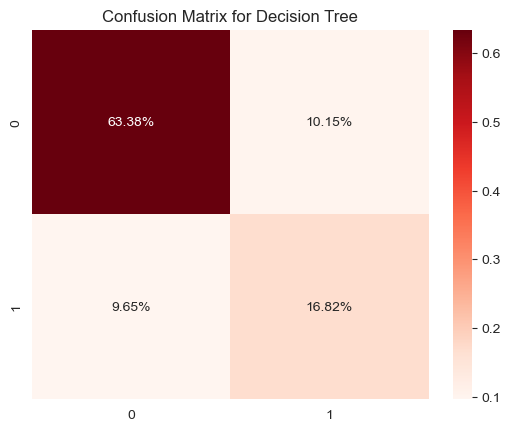

In [200]:
cf1=confusion_matrix(y_test, dt_test_pred)
sns.heatmap((cf1)/np.sum(cf1),annot=True,  fmt='0.2%',cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.show

In [201]:
knn = KNeighborsClassifier(n_neighbors=19)
model1 = knn.fit(X_train, y_train)

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
model2 = dtc.fit(X_train, y_train)

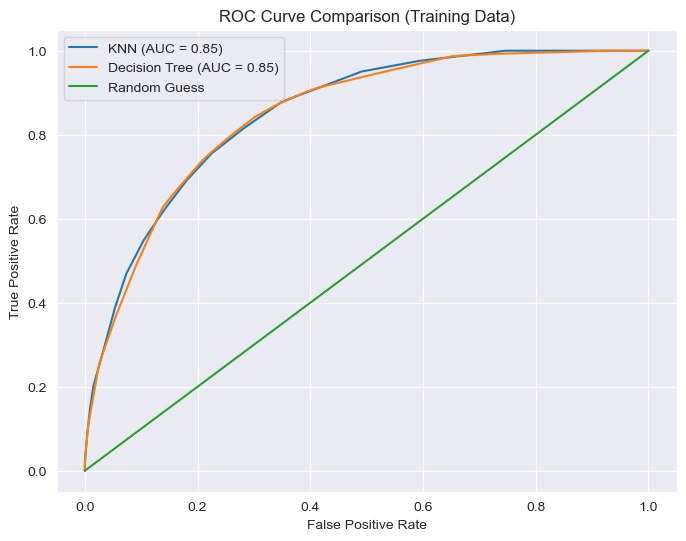

In [202]:
#ROC CURVE COMPARISON FOR TRAIN DATA 
plt.figure(figsize=(8,6))


# KNN
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, model1.predict_proba(X_train)[:,1])
knn_train_auc = roc_auc_score(y_train, model1.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr, knn_train_tpr, label=f'KNN (AUC = {knn_train_auc:.2f})')

# Decision Tree
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, model2.predict_proba(X_train)[:,1])
dt_train_auc = roc_auc_score(y_train, model2.predict_proba(X_train)[:,1])
plt.plot(dt_train_fpr, dt_train_tpr, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')

plt.plot([0, 1], [0, 1], label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training Data)')
plt.legend()
plt.show()


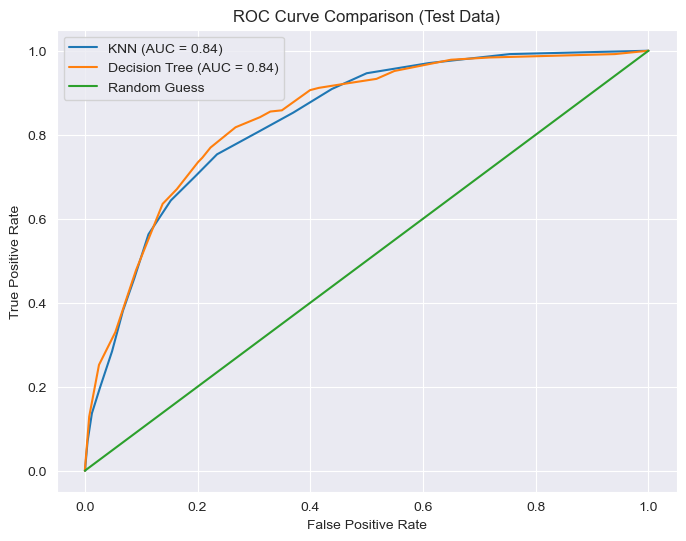

In [203]:
#ROC CURVE COMPARISON FOR TEST DATA
plt.figure(figsize=(8,6))


# KNN
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
knn_test_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr, knn_test_tpr, label=f'KNN (AUC = {knn_test_auc:.2f})')

# Decision Tree
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
dt_test_auc = roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr, dt_test_tpr, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')

plt.plot([0, 1], [0, 1], label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Test Data)')
plt.legend()
plt.show()

In [204]:
# saving  performance metrics for each model in a dataframe 
summary_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Decision Tree'],
    'Train Accuracy': [knn_train_accuracy,dt_train_accuracy],
    'Test Accuracy': [knn_test_accuracy,dt_test_accuracy],
    'Train Precision': [knn_train_precision,dt_train_precision],
    'Test Precision': [knn_test_precision,dt_test_precision],
    'Train Recall': [knn_train_recall,dt_train_recall],
    'Test Recall': [knn_test_recall,dt_test_recall],
    'Train AUC ROC': [knn_train_auc,dt_train_auc],
    'Test AUC ROC': [knn_test_auc,dt_test_auc]
        })

In [205]:
summary_df['F1_train'] = (2*summary_df['Train Precision']*summary_df['Train Recall'])/(summary_df['Train Precision']+summary_df['Train Recall'])
summary_df['F1_test'] = (2*summary_df['Test Precision']*summary_df['Test Recall'])/(summary_df['Test Precision']+summary_df['Test Recall'])

# Interpretation of the Results:

In [206]:
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train AUC ROC,Test AUC ROC,F1_train,F1_test
0,K-Nearest Neighbors,0.803514,0.801278,0.655476,0.642202,0.548128,0.563003,0.851636,0.835281,0.597015,0.600000
1,Decision Tree,0.799610,0.801987,0.621927,0.623684,0.625668,0.635389,0.848234,0.842813,0.623792,0.629482


1. K-Nearest Neighbors:

- The K-Nearest Neighbors model  exhibits an accuracy of around 80% on the training and test set. The recall values are 54% for training and 56% for testing, indicating that the model performs well in predicting positive instances. The precision values are 65% for training and 64% for testing, suggesting that the model is relatively successful in identifying positive instances. The AUC ROC values of 85% for training and 83% for testing indicate that the model has good discriminative power.

2. Decision Tree:

- The decision tree model achieves an accuracy of approximately 80% on training and test set. It exhibits precision values of 62% on the training and test dataset. The recall values are 62% for training and 63% for testing, indicating that the model is relatively successful in identifying positive instances. The AUC ROC values of 84% for training and 84% for testing suggest that the model has good discriminative power.

The important thing to note is the Recall when compared is quite low in K-Nearest Neighbors while Accuracy and AUC ROC Scores are similiar in both models with a slight edge with K-Nearest Neighbors. 

The Decision Tree model shows similar performance to KNN, with good accuracy and precision. It has relatively high recall values, suggesting it is effective in identifying positive instances. Recall being an important metric for our problem statement, Decision Tree has outperformed K-NN by quite a margin. 

From the analysis here, Decision tree seems to be the best choice.